# Estimation of Nd from MoDIS Dataset

### 19-10-2022 <br>
#### Clipping of NetCDF to Shape File

In [2]:
#Imports
import os,sys #user to create and modify file name and save it
from netCDF4 import Dataset#to read the .nc files
import pandas as pd #for dataframe activities
from datetime import datetime,timedelta #for the time related activities
import matplotlib.pyplot as plt #for the Ploting purpose
import numpy as np #numerical fucntions
import datetime 
import warnings #to ignore unnecessary warnings
import xarray as xr
import numpy as np
import regionmask
import geopandas as gpd
warnings.filterwarnings('ignore')

In [3]:
#Reading the shape file
shapefile ="../SHPs/BOB_OCEAN/BOB_OCEAN.shp"
countries=gpd.read_file(shapefile)
countries

: 

: 

<AxesSubplot: >

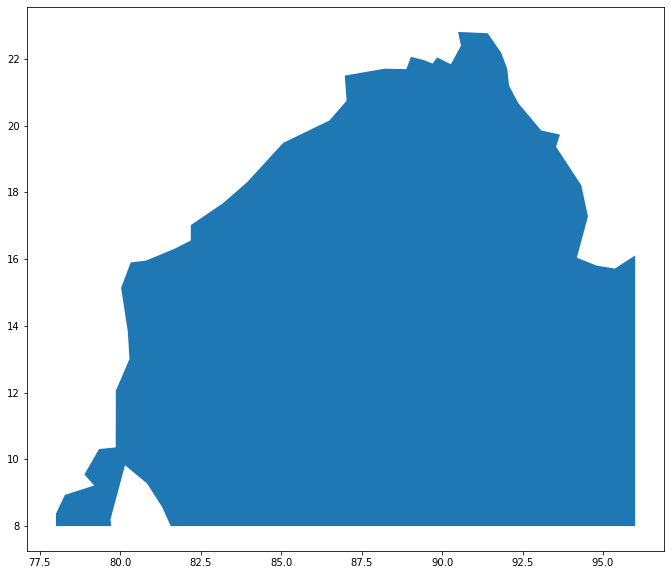

In [3]:
fig, ax =plt.subplots(figsize=(16,10))
countries.plot(ax=ax,column='featurecla') 

In [2]:
c_list=list(countries['featurecla'])
c_list_unique=set(list(countries['featurecla']))
indexes=[c_list.index(x) for x in c_list_unique]

NameError: name 'countries' is not defined

In [ ]:
countries_mask_poly=regionmask.Regions_cls(name='featurecla',numbers=i)

In [22]:
#Reading the file from directory
data=Dataset("/Volumes/PtatoBasket/Datasets/Sample MYD/MYD08_D3.A2005002.061.2018018133541.hdf",'r')
print('Available Variables')
print(data.variables.keys())

OSError: [Errno -128] NetCDF: Attempt to use feature that was not turned on when netCDF was built.: b'/Volumes/PtatoBasket/Datasets/Sample MYD/MYD08_D3.A2005002.061.2018018133541.hdf'